Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import statsmodels.api as sm

In [8]:
# load processed data
data = pd.read_csv('ProcessedData.csv')

In [9]:
# make Date the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


# rename VIX Close to VIX, IT Adj Close_Return to IT Daily Return, HC Adj Close_Return to HC Daily Return, CD Adj Close_Return to CD Daily Return
data.rename(columns={'VIX Close': 'VIX'})
# remame HC Daily Return to Health Care Daily Return, CD Daily Return to Consumer Discretionary Daily Return, IT Daily Return to Information Technology Daily Return
data.rename(columns={'HC_Log_Return': 'Health Care Daily Log Return', 'CD_Log_Return': 'Consumer Discretionary Daily Log Return', 'IT_Log_Return': 'Information Technology Daily Log Return'}, inplace=True)

In [11]:
# Summary statistics for sector returns, oil prices, and VIX
columns_of_interest = [
    'Health Care Daily Log Return', 'Information Technology Daily Log Return',
    'Consumer Discretionary Daily Log Return', 'WTI Log Daily Change', 'VIX Close'
]


summary_stats = data[columns_of_interest].describe().T
summary_stats['Skewness'] = data[columns_of_interest].apply(skew)
summary_stats['Kurtosis'] = data[columns_of_interest].apply(kurtosis)

print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
                                           count       mean       std  \
Health Care Daily Log Return             8010.0   0.000364  0.011460   
Information Technology Daily Log Return  8010.0   0.000503  0.017179   
Consumer Discretionary Daily Log Return  8010.0   0.000350  0.013603   
WTI Log Daily Change                     8010.0   0.000231  0.026352   
VIX Close                                8010.0  19.606010  8.083043   

                                              min        25%        50%  \
Health Care Daily Log Return            -0.105274  -0.005121   0.000565   
Information Technology Daily Log Return -0.149833  -0.007401   0.001147   
Consumer Discretionary Daily Log Return -0.128772  -0.005766   0.000825   
WTI Log Daily Change                    -0.281382  -0.012368   0.000858   
VIX Close                                9.140000  13.750000  17.780000   

                                               75%        max  Skewness  \
Health Care Daily L

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

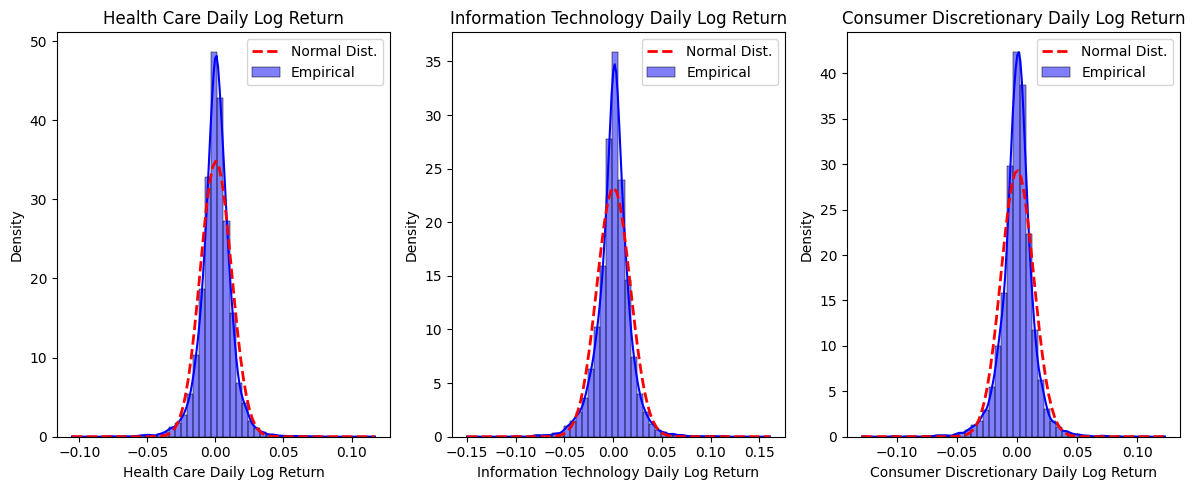

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


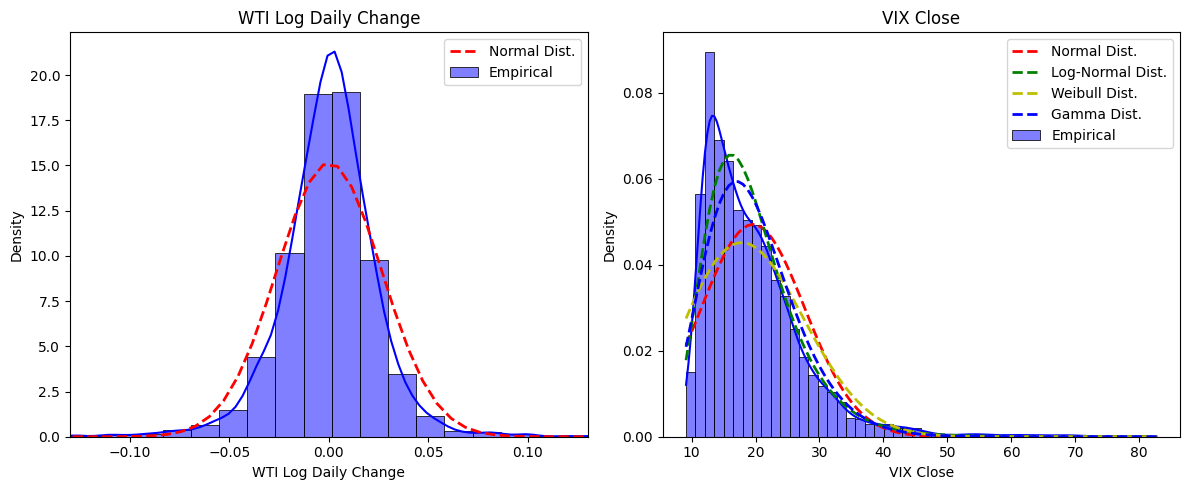

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, lognorm, weibull_min, gamma

# -------------------- FIRST FIGURE: SECTOR LOG RETURNS (1,3) --------------------

# Create a 1-row, 3-column subplot for sector returns
fig1, axes1 = plt.subplots(1, 3, figsize=(12, 5))  

sector_columns = ['Health Care Daily Log Return', 'Information Technology Daily Log Return', 'Consumer Discretionary Daily Log Return']

for i, col in enumerate(sector_columns):
    ax = axes1[i]
    
    # Compute normal distribution
    mu, sigma = data[col].mean(), data[col].std()
    x_vals = np.linspace(data[col].min(), data[col].max(), 100)
    normal_dist = norm.pdf(x_vals, mu, sigma)

    # Plot histogram & KDE
    sns.histplot(data[col], kde=True, ax=ax, bins=50, color="blue", stat="density", label="Empirical")
    
    # Overlay normal distribution curve (dashed line)
    ax.plot(x_vals, normal_dist, 'r--', linewidth=2, label="Normal Dist.")

    # Titles & legend
    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()


# -------------------- SECOND FIGURE: OIL & VIX (1,2) --------------------

# Create a 1-row, 2-column subplot for oil & VIX
fig2, axes2 = plt.subplots(1, 2, figsize=(12, 5))  

oil_column = 'WTI Log Daily Change'
vix_column = 'VIX Close'
other_columns = [oil_column, vix_column]

for i, col in enumerate(other_columns):
    ax = axes2[i]
    
    # Compute normal distribution
    mu, sigma = data[col].mean(), data[col].std()
    x_vals = np.linspace(data[col].min(), data[col].max(), 100)
    normal_dist = norm.pdf(x_vals, mu, sigma)

    # Plot histogram & KDE
    sns.histplot(data[col], kde=True, ax=ax, bins=50, color="blue", stat="density", label="Empirical")
    
    # Overlay normal distribution curve (dashed red line)
    ax.plot(x_vals, normal_dist, 'r--', linewidth=2, label="Normal Dist.")
    
    # Special handling for VIX Close: Add Log-Normal, Weibull, and Gamma Fits
    if col == vix_column:
        # Fit Log-Normal Distribution
        shape, loc, scale = lognorm.fit(data[col], floc=0)  # Fit Log-Normal
        lognorm_dist = lognorm.pdf(x_vals, shape, loc, scale)
        ax.plot(x_vals, lognorm_dist, 'g--', linewidth=2, label="Log-Normal Dist.")
        
        # Fit Weibull Distribution
        shape_weibull, loc_weibull, scale_weibull = weibull_min.fit(data[col], floc=0)  # Fit Weibull
        weibull_dist = weibull_min.pdf(x_vals, shape_weibull, loc_weibull, scale_weibull)
        ax.plot(x_vals, weibull_dist, 'y--', linewidth=2, label="Weibull Dist.")
        
        # Fit Gamma Distribution
        shape_gamma, loc_gamma, scale_gamma = gamma.fit(data[col], floc=0)  # Fit Gamma
        gamma_dist = gamma.pdf(x_vals, shape_gamma, loc_gamma, scale_gamma)
        ax.plot(x_vals, gamma_dist, 'b--', linewidth=2, label="Gamma Dist.")

    # Custom limits for oil price change
    if col == oil_column:
        ax.set_xlim(-0.13, 0.13)

    # Titles & legend
    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()


In [14]:
import scipy.stats as stats
import pandas as pd

# Function to perform Jarque-Bera test
def jarque_bera_test(series):
    jb_stat, p_value = stats.jarque_bera(series)
    return {"JB Statistic": jb_stat, "p-value": p_value}

# Apply JB test to all columns
jb_results = {col: jarque_bera_test(data[col]) for col in columns_of_interest}

# Convert to DataFrame for better readability
jb_df = pd.DataFrame(jb_results).T
print(jb_df)


                                          JB Statistic  p-value
Health Care Daily Log Return              17053.009247      0.0
Information Technology Daily Log Return   11811.231019      0.0
Consumer Discretionary Daily Log Return   18733.081476      0.0
WTI Log Daily Change                     205513.397394      0.0
VIX Close                                 28049.072485      0.0


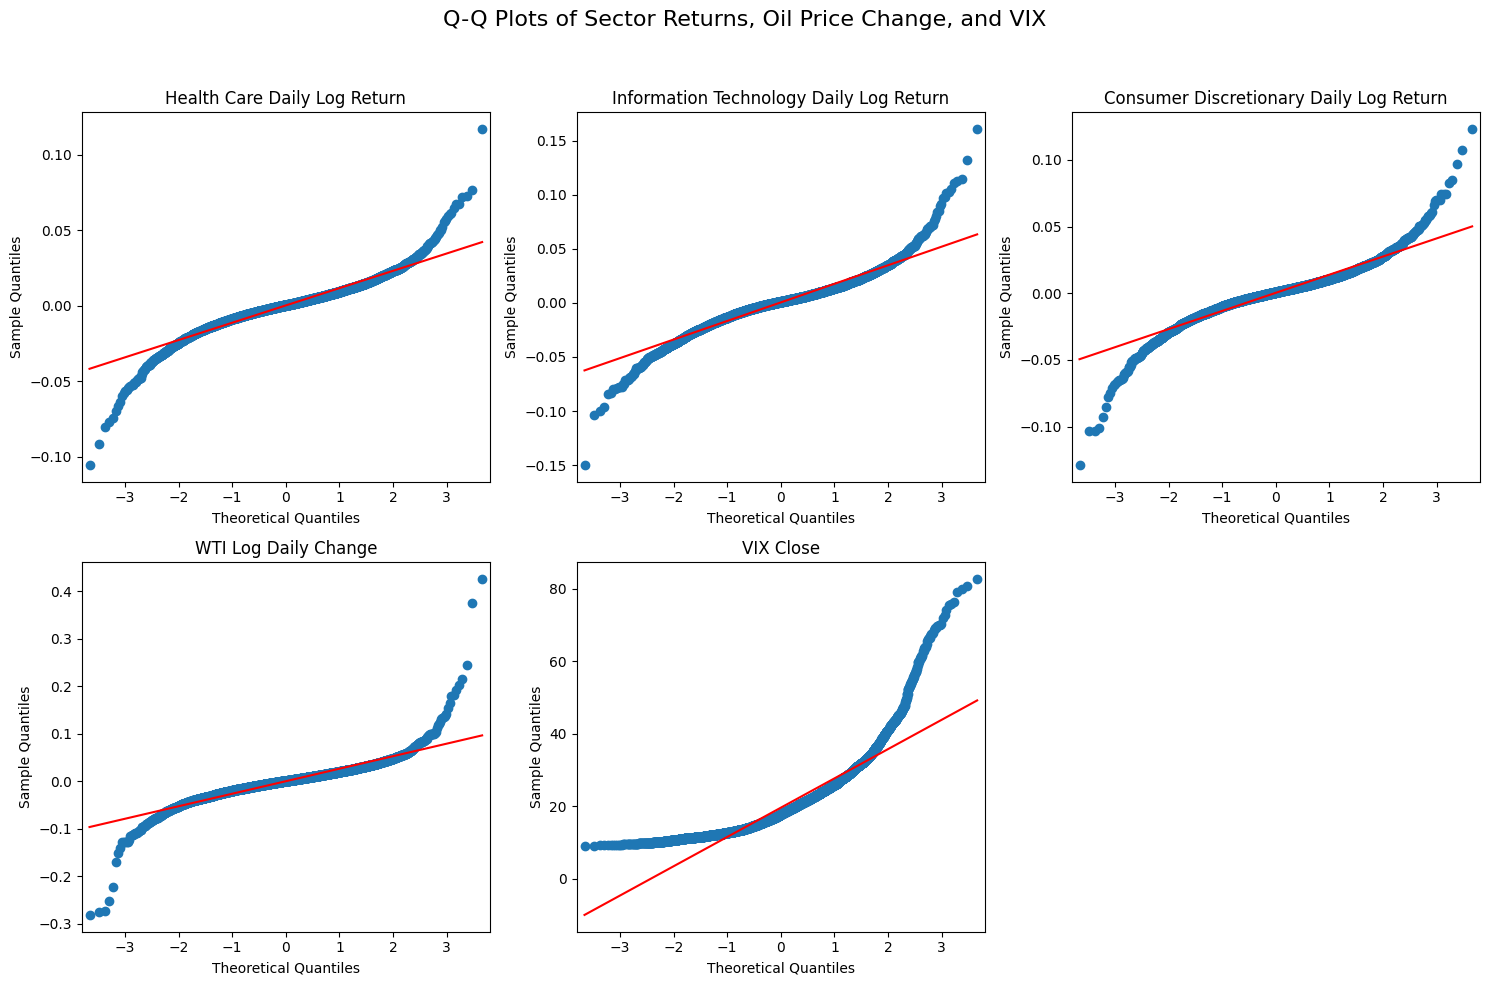

In [23]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.gridspec as gridspec

# Custom layout using GridSpec
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1])
fig.suptitle("Q-Q Plots of Sector Returns, Oil Price Change, and VIX", fontsize=16)

# Top three Q-Q plots
axes = []
for i in range(3):
    ax = fig.add_subplot(gs[0, i])
    sm.qqplot(data[columns_of_interest[i]], line='s', ax=ax)
    ax.set_title(columns_of_interest[i])
    axes.append(ax)

# Bottom two Q-Q plots, centered
ax4 = fig.add_subplot(gs[1, 0:1])
sm.qqplot(data[columns_of_interest[3]], line='s', ax=ax4)
ax4.set_title(columns_of_interest[3])

ax5 = fig.add_subplot(gs[1, 1:2])
sm.qqplot(data[columns_of_interest[4]], line='s', ax=ax5)
ax5.set_title(columns_of_interest[4])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [29]:
# stationarity testing
# Augmented Dickey-Fuller test
def adf_test(series, signif=0.05):
    dftest = sm.tsa.adfuller(series, autolag='BIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# Lags Used', '# Observations Used'])
    for key, value in dftest[4].items():
        adf['Critical Value (%s)' % key] = value
    print(adf)
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")

# ADF Test on each column
print("\nADF Test Results:")
for col in columns_of_interest:
    print(f"\n{col}:")
    adf_test(data[col])


ADF Test Results:

Health Care Daily Log Return:
Test Statistic           -91.645475
p-value                    0.000000
# Lags Used                0.000000
# Observations Used     8009.000000
Critical Value (1%)       -3.431167
Critical Value (5%)       -2.861901
Critical Value (10%)      -2.566962
dtype: float64
 Series is Stationary

Information Technology Daily Log Return:
Test Statistic           -93.441272
p-value                    0.000000
# Lags Used                0.000000
# Observations Used     8009.000000
Critical Value (1%)       -3.431167
Critical Value (5%)       -2.861901
Critical Value (10%)      -2.566962
dtype: float64
 Series is Stationary

Consumer Discretionary Daily Log Return:
Test Statistic           -91.148726
p-value                    0.000000
# Lags Used                0.000000
# Observations Used     8009.000000
Critical Value (1%)       -3.431167
Critical Value (5%)       -2.861901
Critical Value (10%)      -2.566962
dtype: float64
 Series is Stationary

In [27]:
# Zivot-Andrews test
def zivot_andrews_test(series, signif=0.05):
    result = sm.tsa.zivot_andrews(series)
    test_stat = result[0]
    p_value = result[1]
    crit_vals = result[2]
    print(f" Test Statistic: {test_stat}")
    print(f" p-value: {p_value}")
    print(f" 5% Critical Value: {crit_vals['5%']}")
    if p_value <= signif:
        print(" Series is Stationary")
    else:
        print(" Series is Non-Stationary")

# Zivot-Andrews Test on each column
print("\nZivot-Andrews Test Results:")
for col in columns_of_interest:
    print(f"\n{col}:")
    zivot_andrews_test(data[col])


Zivot-Andrews Test Results:

Health Care Daily Log Return:
 Test Statistic: -19.167470551376802
 p-value: 1e-05
 5% Critical Value: -4.81067
 Series is Stationary

Information Technology Daily Log Return:
 Test Statistic: -22.250020810157892
 p-value: 1e-05
 5% Critical Value: -4.81067
 Series is Stationary

Consumer Discretionary Daily Log Return:
 Test Statistic: -16.97323381165585
 p-value: 1e-05
 5% Critical Value: -4.81067
 Series is Stationary

WTI Log Daily Change:
 Test Statistic: -16.209071253473425
 p-value: 1e-05
 5% Critical Value: -4.81067
 Series is Stationary

VIX Close:
 Test Statistic: -7.459473237437887
 p-value: 1e-05
 5% Critical Value: -4.81067
 Series is Stationary


In [62]:
# Kwiatkowski-Phillips_Schmidt-Shin test
def kpss_test(series, signif=0.05):
    kpsstest = sm.tsa.kpss(series, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output['Critical Value (%s)' % key] = value
    print(kpss_output)
    p = kpss_output['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
    
# KPSS Test on each column
print("\nKPSS Test Results:")

for col in columns_of_interest:
    print(f"\n{col}:")
    kpss_test(data[col])


KPSS Test Results:

Health Care Daily Log Return:
Test Statistic            0.14862
p-value                   0.10000
Lags Used                27.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64
 Series is Non-Stationary

Information Technology Daily Log Return:
Test Statistic            0.179821
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
 Series is Non-Stationary

Consumer Discretionary Daily Log Return:
Test Statistic            0.088782
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
 Series is Non-Stationary

WTI Log Daily

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. T

In [63]:
# Dickey-Fuller GLS test
def df_gls_test(series, signif=0.05):
    dfgls = sm.tsa.adfuller(series, regression='ct', autolag='BIC')
    dfgls_output = pd.Series(dfgls[0:4], index=['Test Statistic', 'p-value', '# Lags Used', '# Observations Used'])
    for key, value in dfgls[4].items():
        dfgls_output['Critical Value (%s)' % key] = value
    print(dfgls_output)
    p = dfgls_output['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")

# Dickey-Fuller GLS Test on each column
print("\nDickey-Fuller GLS Test Results:")
for col in columns_of_interest:
    print(f"\n{col}:")
    df_gls_test(data[col])


Dickey-Fuller GLS Test Results:

Health Care Daily Log Return:
Test Statistic           -91.255823
p-value                    0.000000
# Lags Used                0.000000
# Observations Used     7956.000000
Critical Value (1%)       -3.959908
Critical Value (5%)       -3.411042
Critical Value (10%)      -3.127375
dtype: float64
 Series is Stationary

Information Technology Daily Log Return:
Test Statistic           -92.922331
p-value                    0.000000
# Lags Used                0.000000
# Observations Used     7956.000000
Critical Value (1%)       -3.959908
Critical Value (5%)       -3.411042
Critical Value (10%)      -3.127375
dtype: float64
 Series is Stationary

Consumer Discretionary Daily Log Return:
Test Statistic           -90.553889
p-value                    0.000000
# Lags Used                0.000000
# Observations Used     7956.000000
Critical Value (1%)       -3.959908
Critical Value (5%)       -3.411042
Critical Value (10%)      -3.127375
dtype: float64
 Series

In [ ]:
import pandas as pd
from arch.unitroot import PhillipsPerron

# Phillips-Perron test function
def pp_test(series, signif=0.05):
    pp_test_result = PhillipsPerron(series)
    test_stat = pp_test_result.stat
    p_value = pp_test_result.pvalue
    # Use BIC to determine the number of lags
    lags = pp_test_result.lags
    nobs = pp_test_result.nobs
    critical_values = pp_test_result.critical_values

    # Display the test results
    print(f'Test Statistic: {test_stat}')
    print(f'p-value: {p_value}')
    print(f'# Lags Used: {lags}')
    print(f'# Observations Used: {nobs}')
    for key, value in critical_values.items():
        print(f'Critical Value ({key}): {value}')

    # Conclusion
    if p_value <= signif:
        print("Series is Stationary")
    else:
        print("Series is Non-Stationary")

print("\nPhillips-Perron Test Results:")
for col in columns_of_interest:
    print(f"\n{col}:")
    pp_test(data[col])



Phillips-Perron Test Results:

Health Care Daily Log Return:
Test Statistic: -92.8911362938265
p-value: 0.0
# Lags Used: 36
# Observations Used: 7956
Critical Value (1%): -3.4311721984802794
Critical Value (5%): -2.861903352540163
Critical Value (10%): -2.5669634078766803
Series is Stationary

Information Technology Daily Log Return:
Test Statistic: -93.35688486397973
p-value: 0.0
# Lags Used: 36
# Observations Used: 7956
Critical Value (1%): -3.4311721984802794
Critical Value (5%): -2.861903352540163
Critical Value (10%): -2.5669634078766803
Series is Stationary

Consumer Discretionary Daily Log Return:
Test Statistic: -90.77651406931966
p-value: 0.0
# Lags Used: 36
# Observations Used: 7956
Critical Value (1%): -3.4311721984802794
Critical Value (5%): -2.861903352540163
Critical Value (10%): -2.5669634078766803
Series is Stationary

WTI Log Daily Change:
Test Statistic: -91.44224167886142
p-value: 0.0
# Lags Used: 36
# Observations Used: 7956
Critical Value (1%): -3.4311721984802794

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


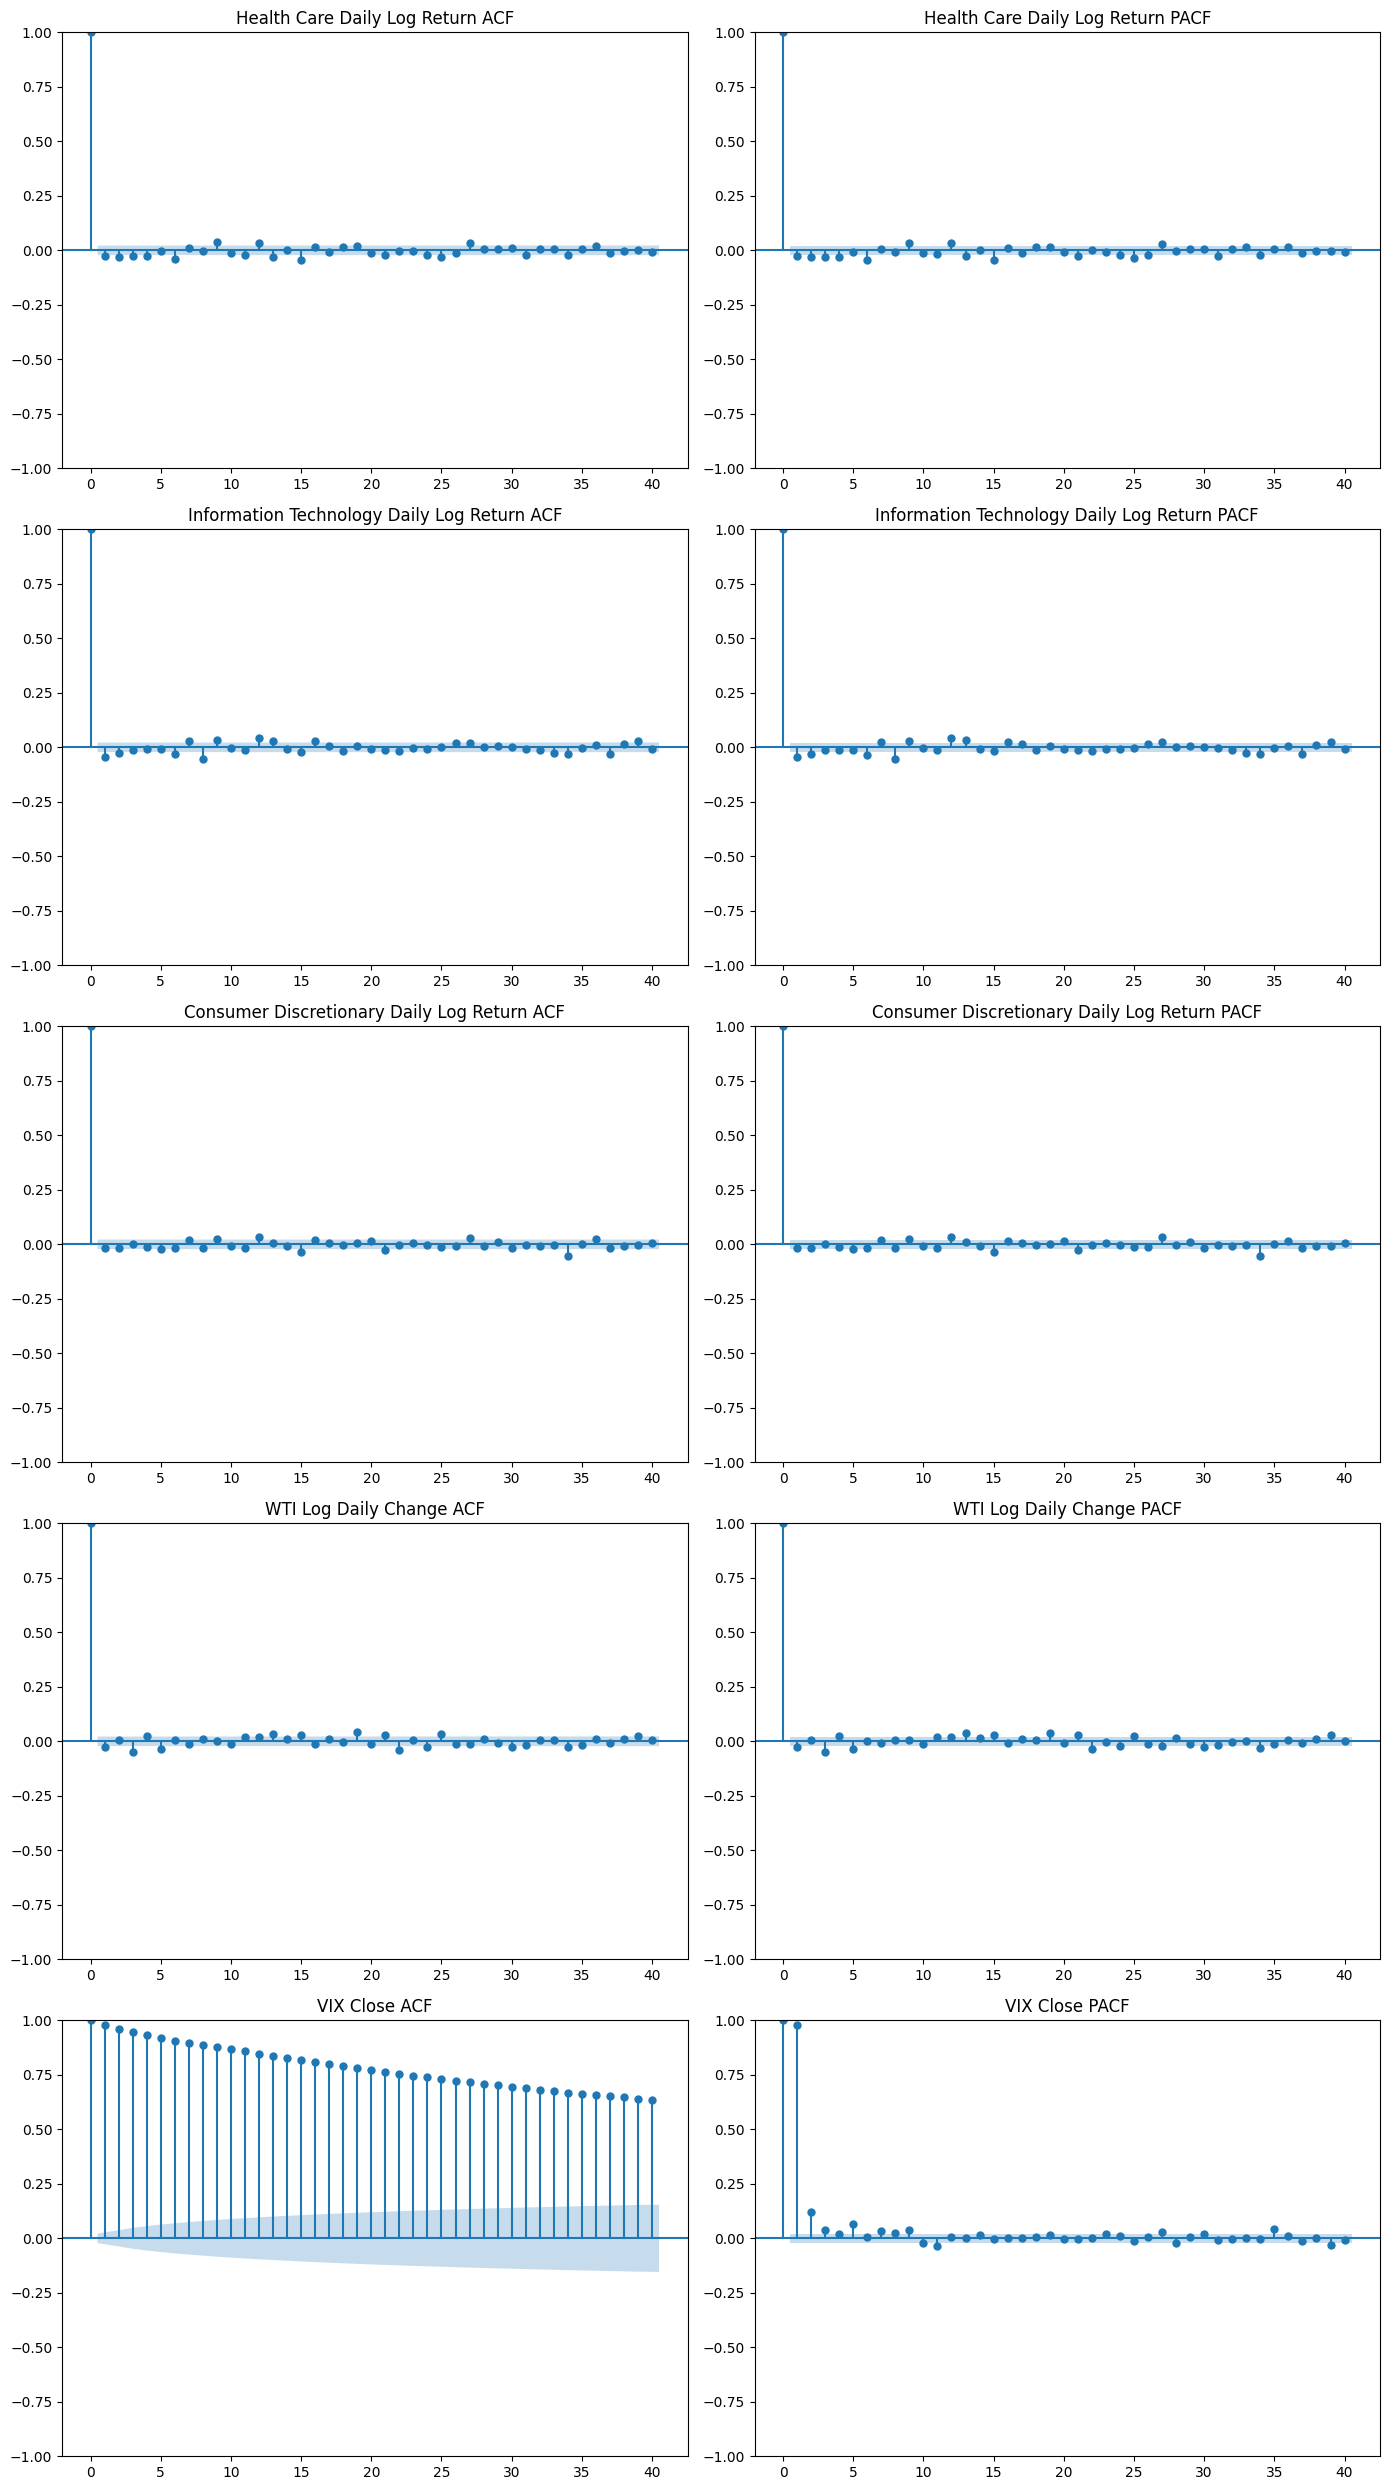

In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define variables to plot
variables = ['Health Care Daily Log Return', 'Information Technology Daily Log Return', 
             'Consumer Discretionary Daily Log Return', 'WTI Log Daily Change', 'VIX Close']

# Create subplots (each variable gets its own row)
fig, axes = plt.subplots(len(variables), 2, figsize=(14, 5 * len(variables)))

# Loop through variables and plot ACF & PACF
for i, var in enumerate(variables):
    sm.graphics.tsa.plot_acf(data[var], lags=40, ax=axes[i, 0])
    sm.graphics.tsa.plot_pacf(data[var], lags=40, ax=axes[i, 1])

    # Set titles
    axes[i, 0].set_title(f"{var} ACF")
    axes[i, 1].set_title(f"{var} PACF")

# Adjust layout for better readability
plt.tight_layout()
plt.show()


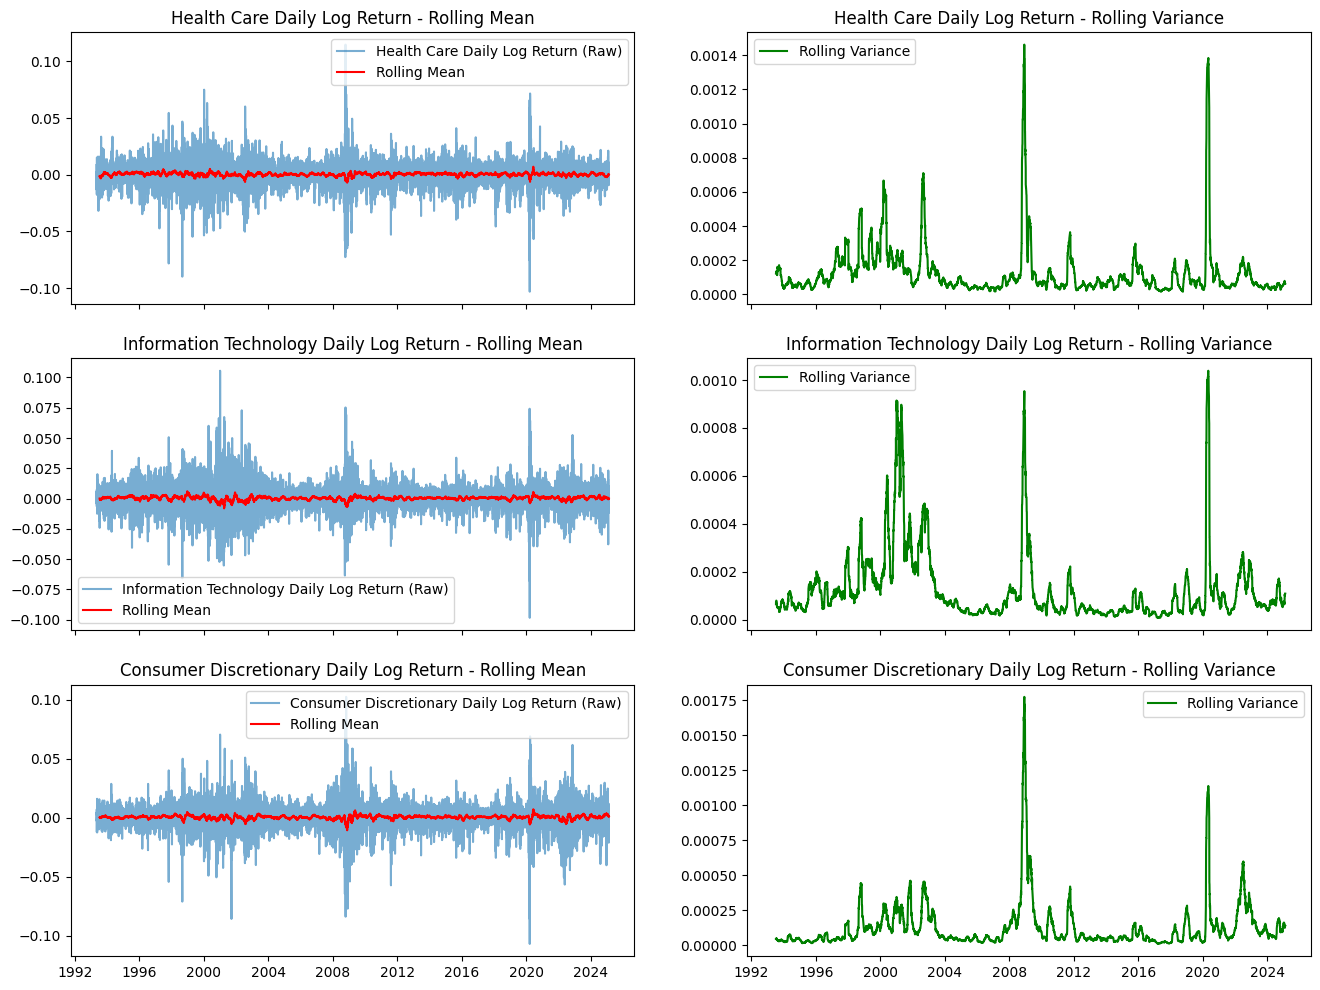

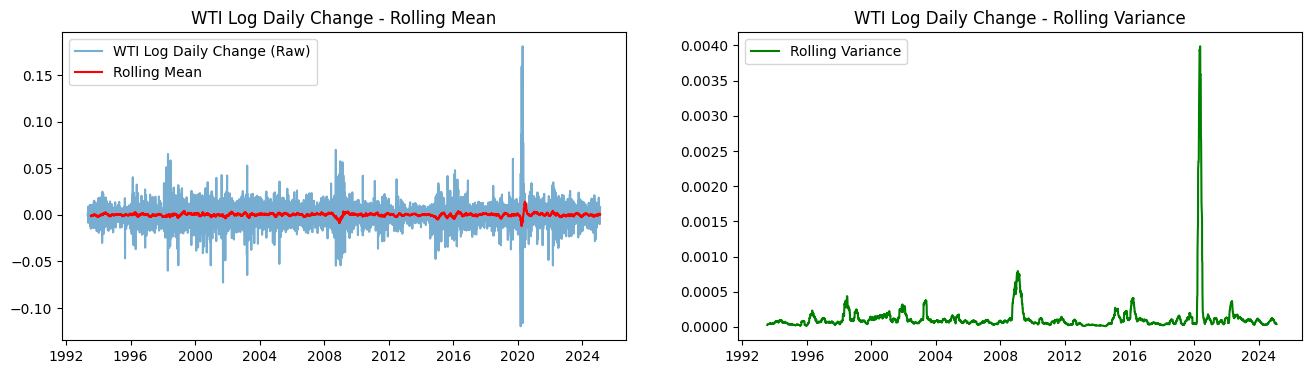

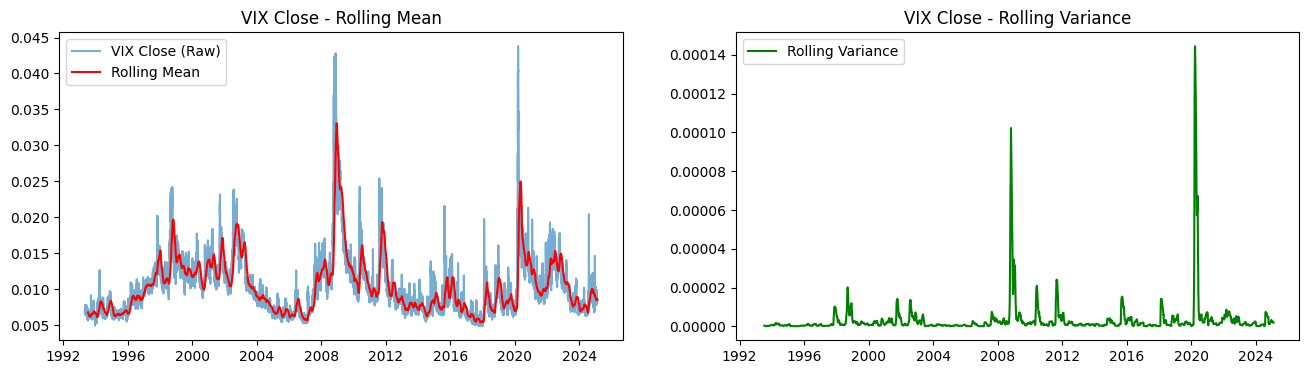

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Set rolling window size
rolling_window = 50  # Adjust as needed

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 12), sharex=True)

# Define columns of interest
sector_columns = ['Health Care Daily Log Return', 'Information Technology Daily Log Return', 'Consumer Discretionary Daily Log Return']
oil_column = 'WTI Log Daily Change'
vix_column = 'VIX Close'

# Plot sector returns rolling mean & variance
for i, col in enumerate(sector_columns):
    axes[i, 0].plot(data['Date'], data[col], label=f"{col} (Raw)", alpha=0.6)
    axes[i, 0].plot(data['Date'], data[col].rolling(window=rolling_window).mean(), color='red', label="Rolling Mean")
    axes[i, 0].set_title(f"{col} - Rolling Mean")
    axes[i, 0].legend()

    axes[i, 1].plot(data['Date'], data[col].rolling(window=rolling_window).var(), color='green', label="Rolling Variance")
    axes[i, 1].set_title(f"{col} - Rolling Variance")
    axes[i, 1].legend()

# Plot oil prices rolling mean & variance
fig, oil_axes = plt.subplots(1, 2, figsize=(16, 4), sharex=True)
oil_axes[0].plot(data['Date'], data[oil_column], label=f"{oil_column} (Raw)", alpha=0.6)
oil_axes[0].plot(data['Date'], data[oil_column].rolling(window=rolling_window).mean(), color='red', label="Rolling Mean")
oil_axes[0].set_title(f"{oil_column} - Rolling Mean")
oil_axes[0].legend()

oil_axes[1].plot(data['Date'], data[oil_column].rolling(window=rolling_window).var(), color='green', label="Rolling Variance")
oil_axes[1].set_title(f"{oil_column} - Rolling Variance")
oil_axes[1].legend()

# Plot VIX rolling mean & variance
fig, vix_axes = plt.subplots(1, 2, figsize=(16, 4), sharex=True)
vix_axes[0].plot(data['Date'], data[vix_column], label=f"{vix_column} (Raw)", alpha=0.6)
vix_axes[0].plot(data['Date'], data[vix_column].rolling(window=rolling_window).mean(), color='red', label="Rolling Mean")
vix_axes[0].set_title(f"{vix_column} - Rolling Mean")
vix_axes[0].legend()

vix_axes[1].plot(data['Date'], data[vix_column].rolling(window=rolling_window).var(), color='green', label="Rolling Variance")
vix_axes[1].set_title(f"{vix_column} - Rolling Variance")
vix_axes[1].legend()

# Show all plots
plt.show()


In [15]:
data.columns

Index(['Date', 'WTI Spot Price', 'VIX Close', 'IT Adj Close', 'HC Adj Close',
       'CD Adj Close', 'IT Volume', 'HC Volume', 'CD Volume',
       'Information Technology Daily Log Return',
       'Health Care Daily Log Return',
       'Consumer Discretionary Daily Log Return', 'WTI Log Daily Change'],
      dtype='object')

Just for fun to show that the prices themselves are definately not stationary

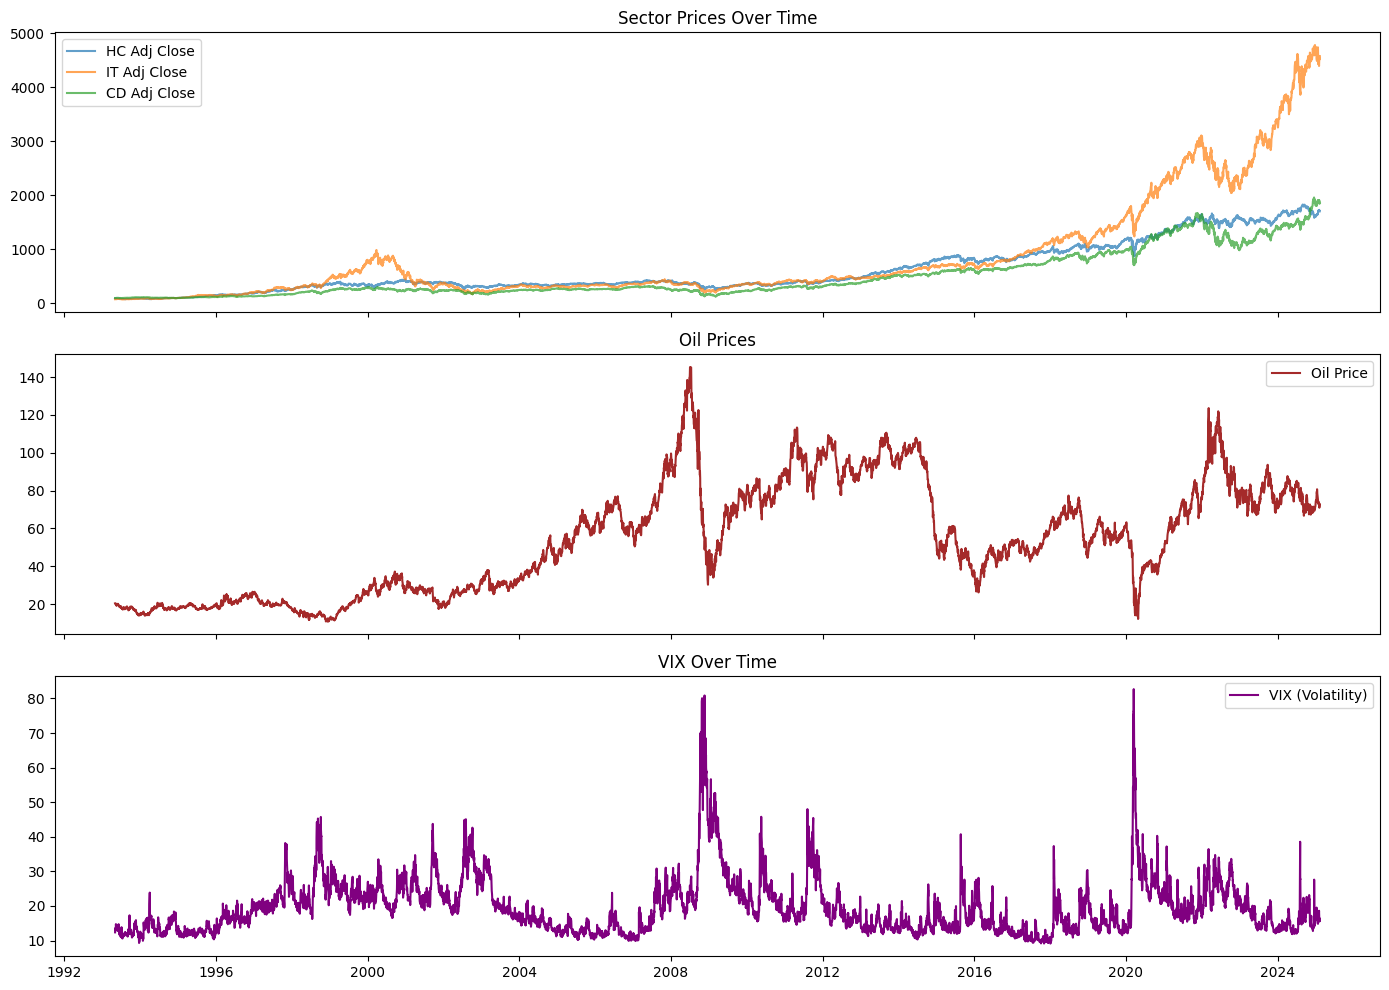

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Plot sector returns over time
for col in ['HC Adj Close', 'IT Adj Close', 'CD Adj Close']:
    axes[0].plot(data['Date'], data[col], label=col, alpha=0.7)
axes[0].set_title("Sector Prices Over Time")
axes[0].legend()

# Plot Oil Prices
axes[1].plot(data['Date'], data['WTI Spot Price'], color='brown', label="Oil Price")
axes[1].set_title("Oil Prices")
axes[1].legend()

# Plot VIX
axes[2].plot(data['Date'], data['VIX Close'], color='purple', label="VIX (Volatility)")
axes[2].set_title("VIX Over Time")
axes[2].legend()

plt.tight_layout()
plt.show()


Time Series of the Log-Returns to visually inspect stationarity

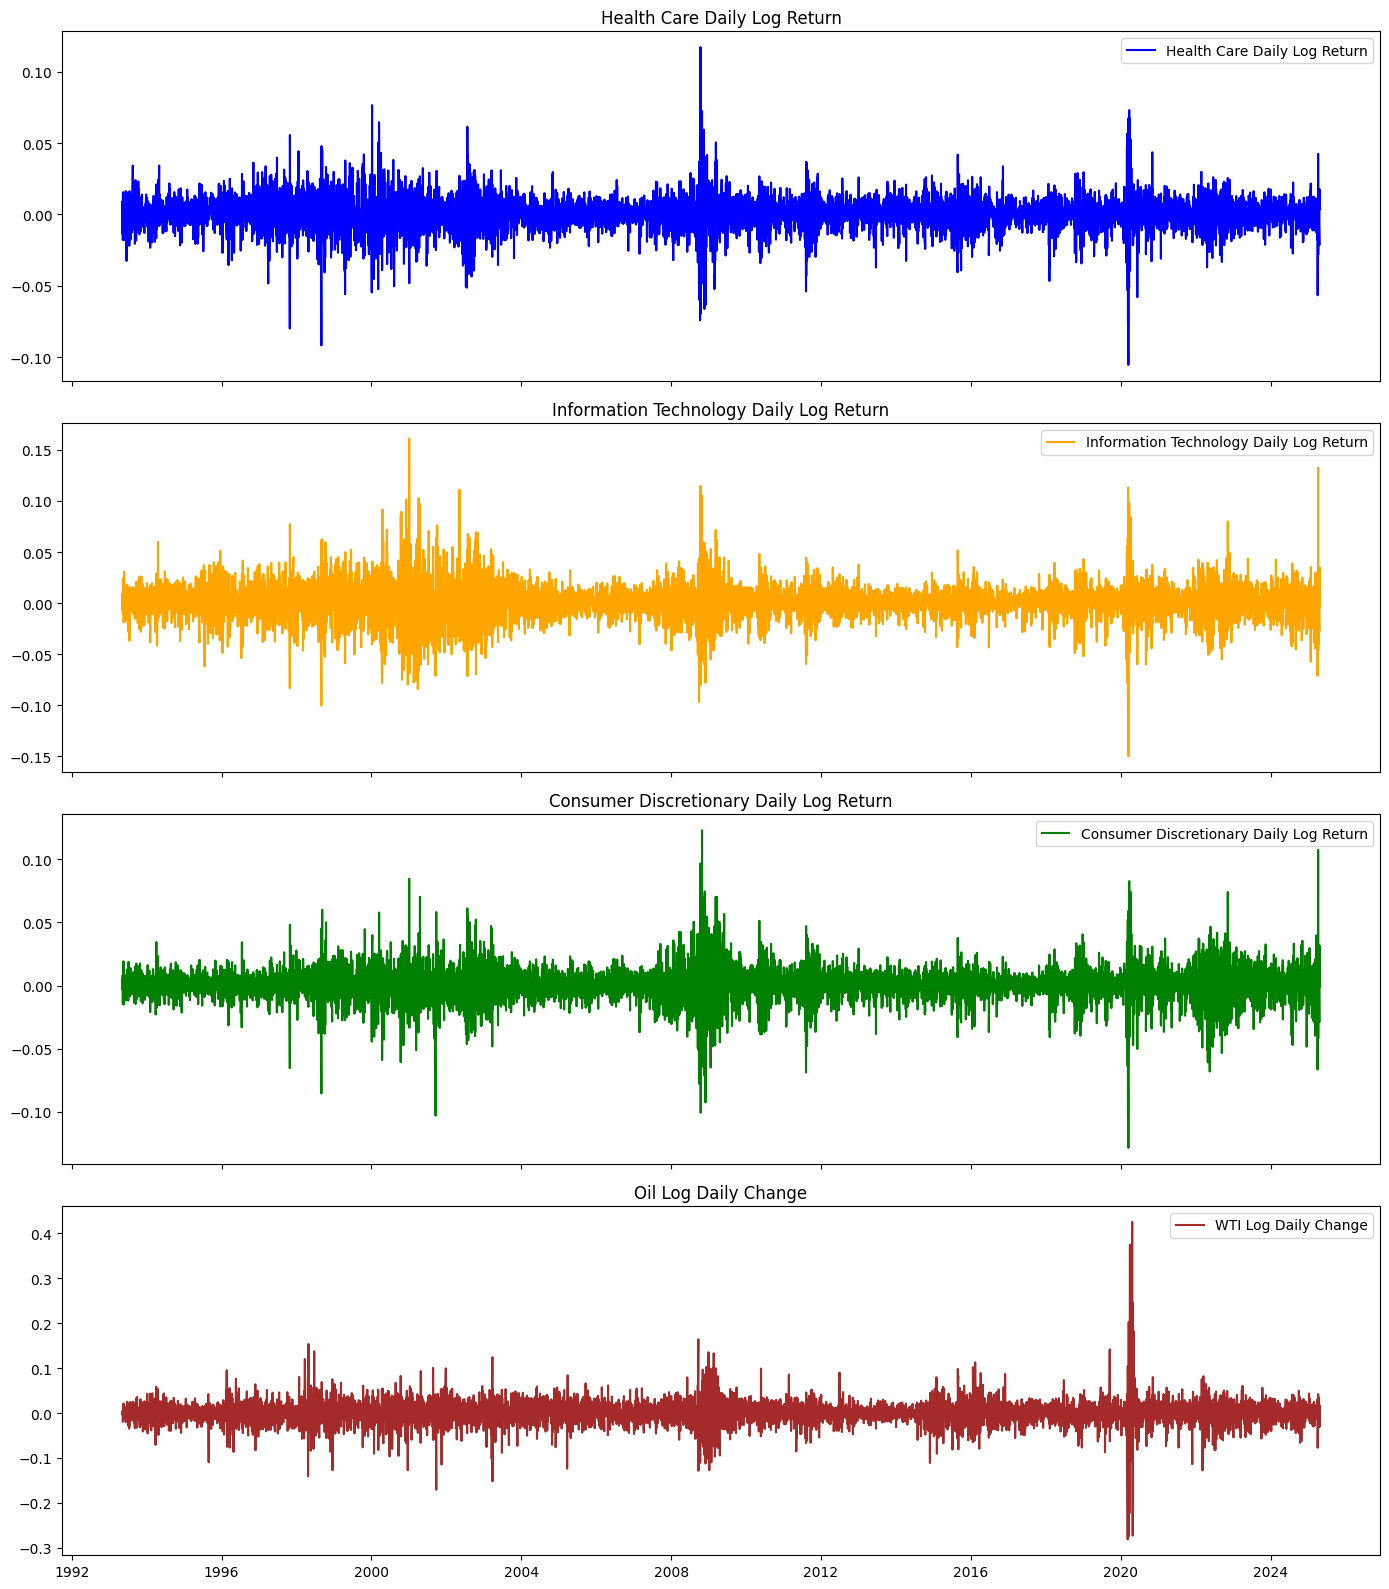

In [26]:
fig, axes = plt.subplots(4, 1, figsize=(14, 16), sharex=True)


# Plot Health Care log return
axes[0].plot(data.index, data['Health Care Daily Log Return'], color='blue', label='Health Care Daily Log Return')
axes[0].set_title("Health Care Daily Log Return")
axes[0].legend()

# Plot Information Technology log return
axes[1].plot(data.index, data['Information Technology Daily Log Return'], color='orange', label='Information Technology Daily Log Return')
axes[1].set_title("Information Technology Daily Log Return")
axes[1].legend()

# Plot Consumer Discretionary log return
axes[2].plot(data.index, data['Consumer Discretionary Daily Log Return'], color='green', label='Consumer Discretionary Daily Log Return')
axes[2].set_title("Consumer Discretionary Daily Log Return")
axes[2].legend()

# Plot Oil log returns
axes[3].plot(data.index, data[oil_column], color='brown', label=oil_column)
axes[3].set_title("Oil Log Daily Change")
axes[3].legend()

plt.tight_layout()
plt.show()
